P2 Project Submission
By Garrett Busch 
Jan 2017

Intro 

Baseball America's golden pasttime. This one sport has truly been a source of entertainment for the USA for generations. Beyond the awe-inspiring athletic feats of athletes like Bonds, Chapman, Jackson lies an advanced sabermetric world full of mathmatical measures to apply. In terms of American sports, Baseball, has always owned virtue to numbers and/or metrics. Ask any baseball fan what "three-hundred" is and they will likely respond with the measure at which a hitter is able to attain a hit in any given at-bat (and to be considered very good at it). With the advent of new technologies such as statcast we are able to analyze this game like its never been done before.

Yet, there is still so much to garner from the information of Baseball's past. One such question, that for me, has always been truly hard to magnify but becomes evident as players ascend the little league ranks to the bigs is 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

#GHreposit = "https://raw.githubusercontent.com/thrabchak/Udacity-Data-Analysis/"
GHreposit = "https://raw.githubusercontent.com/garrettbusch15/P2-Baseball-Analysis-Project/"
#subfoler = "master/P2%20Baseball%20Managers/data/"
subfolder = "master/Data/"

In [2]:
def determine_fair_weather(x):
    fair_weather_stats = ['CA','TX','FL','AZ','NV','NM', 'GA', 'LA']
    if x in fair_weather_stats:
        return "Year-Round"
    return "Not Year-Round"

In [3]:
# Shift-Tab to see paramters/help for function
fileMaster = pd.read_csv(GHreposit + subfolder + 'Master.csv',index_col='playerID')
fileBatting = pd.read_csv(GHreposit + subfolder + 'Batting.csv',index_col=['playerID','yearID','teamID'])
filePitching = pd.read_csv(GHreposit + subfolder + 'Pitching.csv',index_col=['playerID','yearID','teamID'])
fileFielding = pd.read_csv(GHreposit + subfolder + 'Fielding.csv',index_col=['playerID','yearID','teamID'])
fileAppearance = pd.read_csv(GHreposit + subfolder + 'Appearances.csv',index_col=['playerID','yearID','teamID'])
fileSalaries = pd.read_csv(GHreposit + subfolder + 'Salaries.csv')
fileHOF = pd.read_csv(GHreposit + subfolder + 'HallOfFame.csv')
fileAllStart = pd.read_csv(GHreposit + subfolder + 'AllstarFull.csv')
fileManagers = pd.read_csv(GHreposit + subfolder + 'Managers.csv')
fileAwards = pd.read_csv(GHreposit + subfolder + 'AwardsPlayers.csv')

In [4]:
fileMaster['finalGame'].fillna('1/24/2015', inplace=True)

In [30]:
fileMaster['StateWeather'] = fileMaster.applymap(determine_fair_weather).all()

In [6]:
fileMaster['debut'] = pd.to_datetime(fileMaster['debut'])
fileMaster['finalGame'] = pd.to_datetime(fileMaster['finalGame'])
fileMaster['careerLength'] = fileMaster['finalGame'] - fileMaster['debut']

In [31]:
fileMaster.head(15)

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,StateWeather,careerLength
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,205.0,75.0,R,R,2004-04-06,2013-09-28,aardd001,aardsda01,NaN,3462 days
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,NaN,8209 days
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,NaN,3456 days
aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,...,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN,4817 days
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,NaN,1676 days
abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,NaN,...,220.0,73.0,L,L,2010-07-28,2014-09-27,abadf001,abadfe01,NaN,1522 days
abadijo01,1854.0,11.0,4.0,USA,PA,Philadelphia,1905.0,5.0,17.0,USA,...,192.0,72.0,R,R,1875-04-26 00:00:00,1875-06-10 00:00:00,abadj101,abadijo01,NaN,45 days
abbated01,1877.0,4.0,15.0,USA,PA,Latrobe,1957.0,1.0,6.0,USA,...,170.0,71.0,R,R,1897-09-04 00:00:00,1910-09-15,abbae101,abbated01,NaN,4758 days
abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,USA,...,175.0,71.0,R,R,1892-06-14 00:00:00,1896-09-23 00:00:00,abbeb101,abbeybe01,NaN,1562 days


In [8]:
fileBatting.head(5)

,,,stint,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,yearID,teamID,,,,,,,,,,,,,,,,,,,
abercda01,1871,TRO,1,NaN,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
addybo01,1871,RC1,1,NaN,25,118.0,30.0,32.0,6.0,0.0,0.0,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
allisar01,1871,CL1,1,NaN,29,137.0,28.0,40.0,4.0,5.0,0.0,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
allisdo01,1871,WS3,1,NaN,27,133.0,28.0,44.0,10.0,2.0,2.0,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
ansonca01,1871,RC1,1,NaN,25,120.0,29.0,39.0,11.0,3.0,0.0,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [9]:
filePitching.head(5)

,,,stint,lgID,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
playerID,yearID,teamID,,,,,,,,,,,,,,,,,,,,,
bechtge01,1871,PH1,1,NaN,1,2,3,3,2,0,0,78.0,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
brainas01,1871,WS3,1,NaN,12,15,30,30,30,0,0,792.0,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
fergubo01,1871,NY2,1,NaN,0,0,1,0,0,0,0,3.0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
fishech01,1871,RC1,1,NaN,4,16,24,24,22,1,0,639.0,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
fleetfr01,1871,NY2,1,NaN,0,1,1,1,1,0,0,27.0,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [10]:
fileFielding.head(5)

stint lgID POS   G  GS  InnOuts    PO     A     E  \
playerID  yearID teamID                                                      
abercda01 1871   TRO         1  NaN  SS   1 NaN      NaN   1.0   3.0   2.0   
addybo01  1871   RC1         1  NaN  2B  22 NaN      NaN  67.0  72.0  42.0   
                 RC1         1  NaN  SS   3 NaN      NaN   8.0  14.0   7.0   
allisar01 1871   CL1         1  NaN  2B   2 NaN      NaN   1.0   4.0   0.0   
                 CL1         1  NaN  OF  29 NaN      NaN  51.0   3.0   7.0   

                          DP  PB  WP  SB  CS  ZR  
playerID  yearID teamID                           
abercda01 1871   TRO     0.0 NaN NaN NaN NaN NaN  
addybo01  1871   RC1     5.0 NaN NaN NaN NaN NaN  
                 RC1     0.0 NaN NaN NaN NaN NaN  
allisar01 1871   CL1     0.0 NaN NaN NaN NaN NaN  
                 CL1     1.0 NaN NaN NaN NaN NaN

In [11]:
fileAppearance.head(5)

,,,lgID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
playerID,yearID,teamID,,,,,,,,,,,,,,,,,,
barnero01,1871,BS1,NaN,31.0,NaN,31,31.0,0,0,0,16,0,15,0,0,0,0,NaN,NaN,NaN
barrofr01,1871,BS1,NaN,18.0,NaN,18,18.0,0,0,0,1,0,0,13,0,4,17,NaN,NaN,NaN
birdsda01,1871,BS1,NaN,29.0,NaN,29,29.0,0,7,0,0,0,0,0,0,27,27,NaN,NaN,NaN
conefr01,1871,BS1,NaN,19.0,NaN,19,19.0,0,0,0,0,0,0,18,0,1,18,NaN,NaN,NaN
gouldch01,1871,BS1,NaN,31.0,NaN,31,31.0,0,0,30,0,0,0,0,0,1,1,NaN,NaN,NaN


There are many things to discover about this data. Having played baseball and having general awareness to many baseball statistics there a certain "random" which may be of fun fact. For instance, it may be interesting to know who was the best "team-mate" of all time, or maybe how players "peak" years have evolved over time.

Some highlited details that Udacity would like me to look at are the relationship between different metrics, analyzing independent (3) and dependent (1) variables, and the characteristics of players with the highest salaries.

Lets begin..

## A few supporting metrics:

Number of people who have played MLB (from dataset).. 18,589

In [12]:
totplayers = fileMaster.shape[0]

How many different countries have been represented in the MLB?.. 52

In [13]:
fileMaster.groupby(['birthCountry']).size()

birthCountry
Afghanistan           1
American Samoa        1
Aruba                 5
At Sea                1
Australia            28
Austria               4
Bahamas               6
Belgium               1
Belize                1
Brazil                2
CAN                 244
China                 1
Colombia             14
Cuba                191
Curacao              14
Czech Republic        4
D.R.                619
Denmark               1
Finland               1
France                8
Germany              45
Greece                1
Guam                  1
Honduras              1
Indonesia             1
Ireland              50
Italy                 7
Jamaica               4
Japan                61
Lithuania             1
Mexico              114
Netherlands          12
Nicaragua            13
Norway                3
P.R.                246
Panama               53
Philippines           1
Poland                5
Russia                8
Saudi Arabia          2
Singapore             1
Slo

So..

In [14]:
len(fileMaster.groupby(['birthCountry']).size())

52

It seems there maybe some holes in our dataset i.e. players without a birth country..

In [15]:
fileMaster.fillna

<bound method DataFrame.fillna of            birthYear  birthMonth  birthDay birthCountry birthState  \
playerID                                                             
aardsda01     1981.0        12.0      27.0          USA         CO   
aaronha01     1934.0         2.0       5.0          USA         AL   
aaronto01     1939.0         8.0       5.0          USA         AL   
aasedo01      1954.0         9.0       8.0          USA         CA   
abadan01      1972.0         8.0      25.0          USA         FL   
abadfe01      1985.0        12.0      17.0         D.R.  La Romana   
abadijo01     1854.0        11.0       4.0          USA         PA   
abbated01     1877.0         4.0      15.0          USA         PA   
abbeybe01     1869.0        11.0      11.0          USA         VT   
abbeych01     1866.0        10.0      14.0          USA         NE   
abbotda01     1862.0         3.0      16.0          USA         OH   
abbotfr01     1874.0        10.0      22.0          USA 

In [16]:
fileMaster.groupby(['birthCountry']).size()

birthCountry
Afghanistan           1
American Samoa        1
Aruba                 5
At Sea                1
Australia            28
Austria               4
Bahamas               6
Belgium               1
Belize                1
Brazil                2
CAN                 244
China                 1
Colombia             14
Cuba                191
Curacao              14
Czech Republic        4
D.R.                619
Denmark               1
Finland               1
France                8
Germany              45
Greece                1
Guam                  1
Honduras              1
Indonesia             1
Ireland              50
Italy                 7
Jamaica               4
Japan                61
Lithuania             1
Mexico              114
Netherlands          12
Nicaragua            13
Norway                3
P.R.                246
Panama               53
Philippines           1
Poland                5
Russia                8
Saudi Arabia          2
Singapore             1
Slo

Of the USA players how many states have been represented?.. 51 (All + DC included)

In [17]:
fileMaster[(fileMaster['birthCountry'] == 'USA')].groupby(['birthState']).size()

birthState
AK      11
AL     321
AR     152
AZ      99
CA    2115
CO      88
CT     204
DC     101
DE      54
FL     469
GA     338
HI      39
IA     217
ID      28
IL    1051
IN     368
KS     210
KY     278
LA     245
MA     660
MD     310
ME      78
MI     430
MN     163
MO     601
MS     198
MT      24
NC     394
ND      16
NE     112
NH      53
NJ     426
NM      28
NV      35
NY    1202
OH    1030
OK     254
OR     125
PA    1414
RI      77
SC     175
SD      37
TN     293
TX     873
UT      38
VA     283
VT      38
WA     189
WI     244
WV     120
WY      14
dtype: int64

In [18]:
len(fileMaster[(fileMaster['birthCountry'] == 'USA')].groupby(['birthState']).size())

51

What % of players have become deceased?.. ~50%

In [19]:
fileMaster.groupby(['deathYear']).size().sum() / totplayers

0

Heaviest/Lightest/Tallest/Shortest reported player ever?

In [20]:
fileMaster.loc[fileMaster['weight'].argmax(),'nameGiven'] + " " + fileMaster.loc[fileMaster['weight'].argmax(),'nameLast'] + " @ " + str(fileMaster['weight'].max())

'Walter Ernest Young @ 320.0'

In [21]:
fileMaster.loc[fileMaster['weight'].argmin(),'nameGiven'] + " " + fileMaster.loc[fileMaster['weight'].argmin(),'nameLast'] + " @ " + str(fileMaster['weight'].min())

'Edward Carl Gaedel @ 65.0'

In [22]:
fileMaster.loc[fileMaster['height'].argmax(),'nameGiven'] + " " + fileMaster.loc[fileMaster['height'].argmax(),'nameLast'] + " @ " + str(fileMaster['height'].max())

'Jon Erich Rauch @ 83.0'

In [23]:
fileMaster.loc[fileMaster['height'].argmin(),'nameGiven'] + " " + fileMaster.loc[fileMaster['height'].argmin(),'nameLast'] + " @ " + str(fileMaster['height'].min())

'Edward Carl Gaedel @ 43.0'

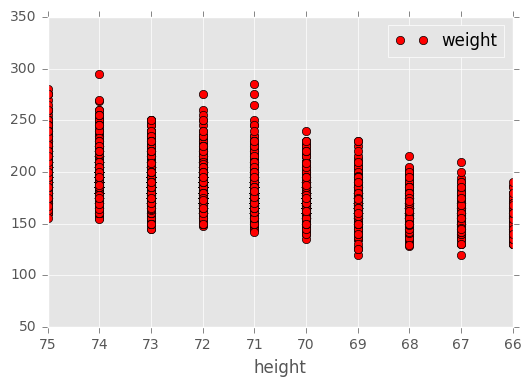

In [24]:
fileMaster.plot(x='height', y='weight', style='ro')

Now lets get to some of these baseball stats. 

Max HRs per year

In [25]:
#fileBatting.groupby('yearID')['HR'].max()

Interesting, and how about something arbitrary, ABs?

In [26]:
#fileBatting.groupby('yearID')['AB'].max()

Lets flip to the defensive side of the ball.

By year, by position, average

In [27]:
#fileFielding.groupby('yearID').groups

Creating a teammate relations table

Example: playerID: {
                    yearID: {
                             teammates playerID: 
                   }        }

In [28]:
def create_teammate_relations():
    relations = {} # initiate main dictionary structure
    for index, row in fileMaster.iterrows(): # loop through main player database
        # As we can assume the fileMaster has all unique players
        # we can then focus on adding the respective seasons the player played as well as the teammates
        x = row['playerID']
        relations[x] = {}
        for i, r in fileAppearance[fileAppearance.playerID == x].iterrows():
            if not r['yearID'] in relations[x]:
                y = r['yearID']
                relations[x][y] = {}
                for i1, r1 in fileAppearance[(fileAppearance.playerID == x) & (fileAppearance.yearID == y)].iterrows():
                    if not r1['teamID'] in relations[x][y]:
                        z = r1['teamID']
                        relations[x][y][z] = {}
                        for i2, r2 in fileAppearance[(fileAppearance.teamID == z) & (fileAppearance.yearID == y)].iterrows():
                            if not (r2['playerID'] in relations[x][y][z]) and (r2['playerID'] != x):
                                w = r2['playerID']
                                relations[x][y][z][w] = []
                    
    return relations

In [29]:
#x = create_teammate_relations()
#print(x[0])